In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weight-height.csv')

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
data.shape

(10000, 3)

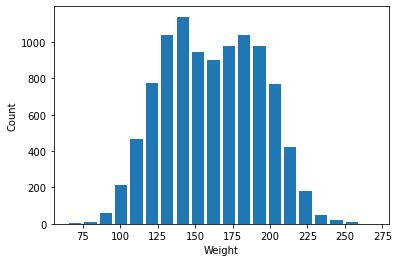

In [4]:
plt.hist(data.Weight, bins=20, rwidth=0.8)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

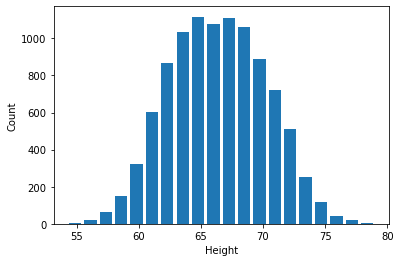

In [5]:
plt.hist(data.Height, bins=20, rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [6]:
data.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
data.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [8]:
QW25,QW75 = data.Weight.quantile([0.25,0.75])

QW25,QW75

(135.8180513055015, 187.16952486868348)

In [9]:
IQRW = QW75 - QW25
IQRW

51.35147356318197

In [10]:
upper_limit_W = QW75 + (1.5*IQRW)
lower_limit_W = QW25 - (1.5*IQRW)

upper_limit_W, lower_limit_W

(264.19673521345646, 58.79084096072856)

In [11]:
data[(data.Weight > upper_limit_W) | (data.Weight<lower_limit_W)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


F:\DS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

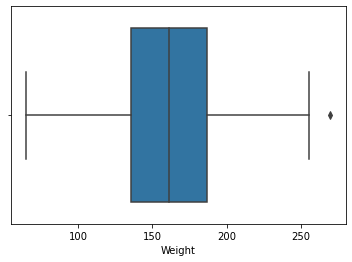

In [12]:
sns.boxplot(data.Weight)

**Yaah ! we caught the only outlier**

In [13]:
QH25,QH75 = data.Height.quantile([0.25,0.75])

QH25,QH75

(63.505620481218955, 69.1742617268347)

In [14]:
IQRH = QH75 - QH25
IQRH

5.668641245615746

In [15]:
upper_limit_H = QH75 + (1.5*IQRH)
lower_limit_H = QH25 - (1.5*IQRH)

upper_limit_H, lower_limit_H

(77.67722359525831, 55.00265861279534)

In [16]:
data[(data.Height > upper_limit_H) | (data.Height<lower_limit_H)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


F:\DS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

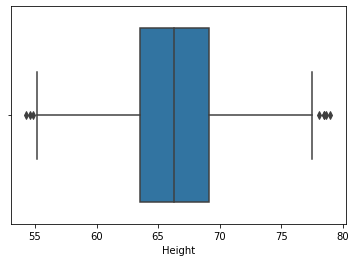

In [17]:
sns.boxplot(data.Height)

In [20]:
data1 = data[((data.Height < upper_limit_H) & (data.Height>lower_limit_H)) & ((data.Weight < upper_limit_W) & (data.Weight>lower_limit_W))]

F:\DS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

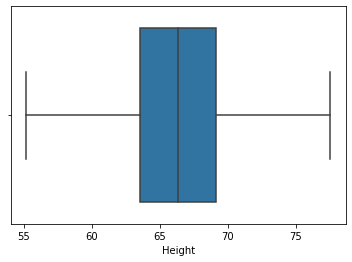

In [21]:
sns.boxplot(data1.Height)

F:\DS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

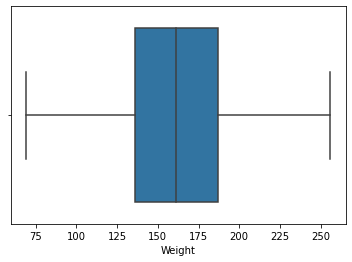

In [22]:
sns.boxplot(data1.Weight)

**Our box plots look much clean after removing Outliers**